In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 14

## Question 1.a)

In [2]:
def hw4_q1_func(n_grids, x_begin, x_end, dx, D, t_grids, which_eq):
    # set parameters
    L = x_end - x_begin
    N_x = int(L/dx) + 1 # number of spatial steps
    x = numpy.linspace(x_begin, x_end, num=N_x)
    f_history = [x.copy()]
    if which_eq == 'q(a) & (b)' :
        # equation for question 1(a) and 2(b)
        for t in t_grids:
            for n in n_grids:
                f = numpy.zeros(N_x)
                for nn in range(1, n+1):
                    eigen_value = (2 * nn - 1) * numpy.pi / (2 * L)
                    f = f + (-1) ** (nn + 1) / (2 * nn - 1) * \
                        numpy.cos(eigen_value * x) * \
                        numpy.exp(-D * t * (eigen_value ** 2))
                f = f * 4 / numpy.pi
                f_history.append(f)
        return f_history
    elif which_eq == 'q(c) & (d)' :
        # equation for question 1(c) and 2(d)
        for t in t_grids:
            for n in n_grids:
                f = numpy.zeros(N_x)
                for nn in range(1, n+1):
                    eigen_value = (2 * nn - 1) * numpy.pi / (2 * L)
                    f = f + (1 / ((2 * nn -1) ** 2)) * \
                        numpy.cos(eigen_value * x) * \
                        numpy.exp(-D * t * (eigen_value ** 2))
                f = f * 8 / (numpy.pi ** 2)
                f_history.append(f)
        return f_history

In [3]:
# set parameters
n_grids = [1, 2, 5, 100, 1000]
x_begin, x_end, D, dx = [0.0, 1.0, 1.0, 0.01]
t_grids = [0.0]
f = hw4_q1_func(n_grids, x_begin, x_end, dx, D, t_grids, 'q(a) & (b)')

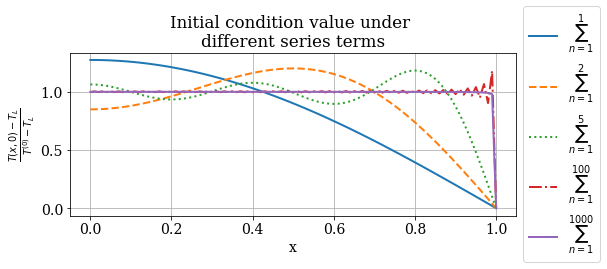

In [4]:
# plot
pyplot.figure(figsize=(8.0, 3.0))
pyplot.title('Initial condition value under \ndifferent series terms')
pyplot.xlabel('x')
pyplot.ylabel(r'$ \frac{T(x,0) - T_L}{T^{(0)} - T_L} $')
pyplot.grid()
pyplot.plot(f[0], f[1], label=r'$ \sum_{n=1}^{1}$', color='C0', linestyle='-', linewidth=2)
pyplot.plot(f[0], f[2], label=r'$ \sum_{n=1}^{2}$', color='C1', linestyle='--', linewidth=2)
pyplot.plot(f[0], f[3], label=r'$ \sum_{n=1}^{5}$', color='C2', linestyle=':', linewidth=2)
pyplot.plot(f[0], f[4], label=r'$ \sum_{n=1}^{100}$', color='C3', linestyle='-.', linewidth=2)
pyplot.plot(f[0], f[5], label=r'$ \sum_{n=1}^{1000}$', color='C4', linestyle='-', linewidth=2)
pyplot.legend(loc='center left', bbox_to_anchor=(1, 0.5));

### Peformance of Different Number of Series Terms

As one should know from initial condition, the $T^{(0)}(x)$ is a consant, which means the value of $ \frac{T(x,0) - T_L}{T^{(0)} - T_L} $ would be euqal to 1.

Therefore, by looking through all curves above, with the number of series terms increasing, the value is more closer to constant 1.

In [5]:
# set parameters
n_grids = [1, 2, 5, 100, 1000]
x_begin, x_end, D, dx = [-10.0, 10.0, 1.0, 0.05]
t_grids = [0.0]
f = hw4_q1_func(n_grids, x_begin, x_end, dx, D, t_grids, 'q(a) & (b)')

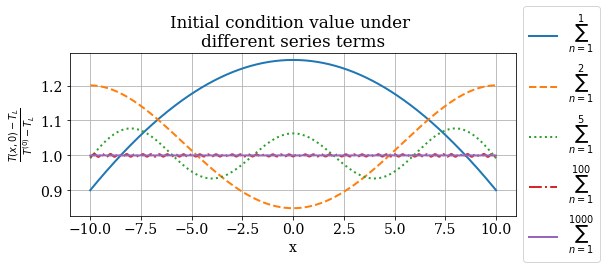

In [6]:
# plot
pyplot.figure(figsize=(8.0, 3.0))
pyplot.title('Initial condition value under \ndifferent series terms')
pyplot.xlabel('x')
pyplot.ylabel(r'$ \frac{T(x,0) - T_L}{T^{(0)} - T_L} $')
pyplot.grid()
pyplot.plot(f[0], f[1], label=r'$ \sum_{n=1}^{1}$', color='C0', linestyle='-', linewidth=2)
pyplot.plot(f[0], f[2], label=r'$ \sum_{n=1}^{2}$', color='C1', linestyle='--', linewidth=2)
pyplot.plot(f[0], f[3], label=r'$ \sum_{n=1}^{5}$', color='C2', linestyle=':', linewidth=2)
pyplot.plot(f[0], f[4], label=r'$ \sum_{n=1}^{100}$', color='C3', linestyle='-.', linewidth=2)
pyplot.plot(f[0], f[5], label=r'$ \sum_{n=1}^{1000}$', color='C4', linestyle='-', linewidth=2)
pyplot.legend(loc='center left', bbox_to_anchor=(1, 0.5));

The period is the suumation of different amplitude and period cosine function. With the number of series increasing, the value of each point is converging to the 1.0, which is the ideal value.

## Question 1.b)

In [7]:
# set parameters
n_grids = [100]
x_begin, x_end, D, dx = [0.0, 1.0, 1.0, 0.01]
t_grids = [0.1, 0.5, 1.0, 10.0]
f = hw4_q1_func(n_grids, x_begin, x_end, dx, D, t_grids, 'q(a) & (b)')

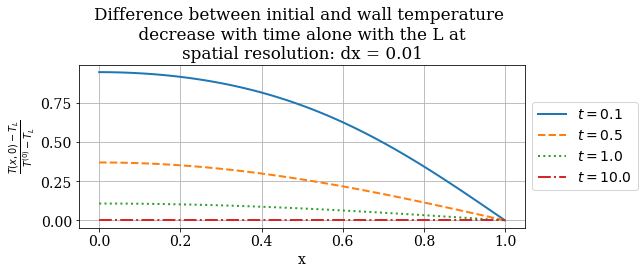

In [8]:
# plot
pyplot.figure(figsize=(8.0, 3.0))
pyplot.title('Difference between initial and wall temperature \
\n decrease with time alone with the L at \nspatial resolution: dx = {}'.format(dx))
pyplot.xlabel('x')
pyplot.ylabel(r'$ \frac{T(x,0) - T_L}{T^{(0)} - T_L} $')
pyplot.grid()
pyplot.plot(f[0], f[1], label=r'$t = 0.1$', color='C0', linestyle='-', linewidth=2)
pyplot.plot(f[0], f[2], label=r'$t = 0.5$', color='C1', linestyle='--', linewidth=2)
pyplot.plot(f[0], f[3], label=r'$t = 1.0$', color='C2', linestyle=':', linewidth=2)
pyplot.plot(f[0], f[4], label=r'$t = 10.0$', color='C3', linestyle='-.', linewidth=2)
pyplot.legend(loc='center left', bbox_to_anchor=(1, 0.5));

### The Curve Varies with Time

As one should know from initial condition, the $T^{(0)}(x) = T^{(0)} + \frac{T_L - T^{(0)}}{L}x $, which means the value of $ \frac{T(x,0) - T_L}{T^{(0)} - T_L} $ would be simplified:

$$
\begin{equation}
\frac{T(x,0) - T_L}{T^{(0)} - T_L} = \frac{T^{(0)}}{T^{(0)} - T_L} - \frac{1}{L}x
\end{equation}
$$

which is a slope that is equal to $-\frac{1}{L}$ line, starting from $\frac{T^{(0)}}{T^{(0)} - T_L}$, which indicates the line at $t = 0.1$ is about correct.

Also, with time flows, the exponential terms will eventually goes close to zero, which indicates the temperature in the space is eventually equal to the wall temperature.

## Question 1.c)

In [9]:
# set parameters
n_grids = [1, 2, 5, 10, 100, 1000]
x_begin, x_end, D, dx = [0.0, 1.0, 1.0, 0.01]
t_grids = [0.0]
f = hw4_q1_func(n_grids, x_begin, x_end, dx, D, t_grids, 'q(c) & (d)')

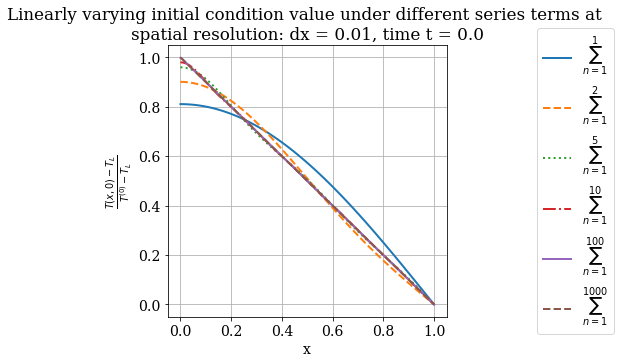

In [10]:
# plot
pyplot.figure(figsize=(5.0, 5.0))
pyplot.title('Linearly varying initial condition value under \
different series terms at \nspatial resolution: dx = {}, time t = 0.0'.format(dx))
pyplot.xlabel('x')
pyplot.ylabel(r'$ \frac{T(x,0) - T_L}{T^{(0)} - T_L} $')
pyplot.grid()
pyplot.plot(f[0], f[1], label=r'$ \sum_{n=1}^{1}$', color='C0', linestyle='-', linewidth=2)
pyplot.plot(f[0], f[2], label=r'$ \sum_{n=1}^{2}$', color='C1', linestyle='--', linewidth=2)
pyplot.plot(f[0], f[3], label=r'$ \sum_{n=1}^{5}$', color='C2', linestyle=':', linewidth=2)
pyplot.plot(f[0], f[4], label=r'$ \sum_{n=1}^{10}$', color='C3', linestyle='-.', linewidth=2)
pyplot.plot(f[0], f[5], label=r'$ \sum_{n=1}^{100}$', color='C4', linestyle='-', linewidth=2)
pyplot.plot(f[0], f[6], label=r'$ \sum_{n=1}^{1000}$', color='C5', linestyle='--', linewidth=2)
pyplot.legend(loc='center left', bbox_to_anchor=(1.3, 0.5));

### Peformance of Different Number of Series Terms

As one should know from initial condition, the $T^{(0)}(x) = T^{(0)} + \frac{T_L - T^{(0)}}{L}x $, which means the value of $ \frac{T(x,0) - T_L}{T^{(0)} - T_L} $ would be simplified:

$$
\begin{equation}
\frac{T(x,0) - T_L}{T^{(0)} - T_L} = \frac{T^{(0)}}{T^{(0)} - T_L} - \frac{1}{L}x
\end{equation}
$$

which is a slope that is equal to $-\frac{1}{L}$ line, in this case L = 1, starting from $\frac{T^{(0)}}{T^{(0)} - T_L}$.

Therefore, if one could look through the curves, with the number of series terms increasing, the curve is closer to the ideal line.

## Question 1.d)

In [11]:
# set parameters
n_grids = [100]
x_begin, x_end, D, dx = [0.0, 1.0, 1.0, 0.01]
t_grids = [0.1, 0.5, 1.0, 10.0]
f = hw4_q1_func(n_grids, x_begin, x_end, dx, D, t_grids, 'q(c) & (d)')

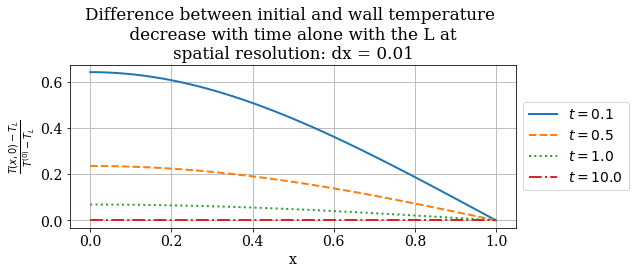

In [12]:
# plot
pyplot.figure(figsize=(8.0, 3.0))
pyplot.title('Difference between initial and wall temperature \
\n decrease with time alone with the L at \nspatial resolution: dx = {}'.format(dx))
pyplot.xlabel('x')
pyplot.ylabel(r'$ \frac{T(x,0) - T_L}{T^{(0)} - T_L} $')
pyplot.grid()
pyplot.plot(f[0], f[1], label=r'$t = 0.1$', color='C0', linestyle='-', linewidth=2)
pyplot.plot(f[0], f[2], label=r'$t = 0.5$', color='C1', linestyle='--', linewidth=2)
pyplot.plot(f[0], f[3], label=r'$t = 1.0$', color='C2', linestyle=':', linewidth=2)
pyplot.plot(f[0], f[4], label=r'$t = 10.0$', color='C3', linestyle='-.', linewidth=2)
pyplot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

### The Curve Varies with Time

Similar with Q1.b, with time flows, the exponential terms will eventually goes close to zero, which indicates the temperature in the space is eventually equal to the wall temperature.